# Neural Network Using PyTorch
In this notebook I will demonstrate how to train a Neural Network using PyTorch. The objective of this notebook is to teach you how to use PyTorch for heavier machine learning models that scikit-learn can't handle. Moreover, Scikit-Learn is kind of like a blackbox, you can't really add a lot of customizatio to it (like how many layers you want etc.).  

In the other notebook, I will have a different datasrt for you to work on so that you can practice NN on PyTorch.

## Libraries Used

In [10]:
# EDA Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Data Loading Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# PyTorch Libraries
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

## Loading Data

### Loading the iris dataset 
This is because it won't crash my computer and this is a more extensive one then the original iris I had.

In [11]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

### Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Configuring the Model
Unlike Scikit-Learn which simply acted as a blackbox modelling technique, PyTorch model's need more model specifications. This allows us to make more flexible models that Scikit-Learn doesn't provide.  

Some of these configurations incldue:
  - **What device do you want the model to run on?**  
  - **How many layers do you want this network to have?**  
  - **What activation functions do you want to be in between each layer (RELU/Sigmoid etc.)?**  
  - **What type of model optimizer do you want?**  
  - **What do you want the loss function to be to calculate gradients?**  

### Selecting the device
As I've probably mentioned a bunch of times before, PyTorch is really powerful because it uses GPUs unlike scikit-learn. In this section, we will be selecting a device for our model.

In [9]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


### Making the Deep Learning Neural Network Class
In this section I will show you how to make a Neural Network class using PyTorch.  

When people say **Deep Learning** this is what they mean, it is utilizing differently layered Neural Networks and activation functions (for hidden layers) to develop more robust and accurate models.

In [14]:
# First Deep Learning Class for you!!!

class Model(nn.Module):

    # Initialization function for our Class
    def __init__(self, input_dim, output_dim):

        # Initializing the super class for Torch's Neural Network
        super(Model, self).__init__()

        # The first layer is in between the input and 1st hidden layer
        self.layer1 = nn.Linear(input_dim, 50)

        # The second layer lies between the 2 hidden layers
        self.layer2 = nn.Linear(50, 50)

        # This layer is between the 2nd hidden layer and the output layer
        self.layer3 = nn.Linear(50, output_dim)
        
    # Initizialing the hidden Layers
    def forward(self, x):

        # Using RELU for the first 2 hidden layers
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))

        # Using Softmax for the final hidden layer, so that it chooses only one label from the output vector
        x = F.softmax(self.layer3(x), dim=1)
        return x

### Getting Optimizers and instantiating the model

In [16]:
model     = Model(X_train.shape[1], 3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

## Training the model
This is the training loop for our PyTorch Model. Making the afformentioned Neural Network class and training loops like this is a Machine Learning engineers bread and butter

In [18]:
EPOCHS  = 100
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 615.28it/s]


## Plotting Accuracy

Text(0.5, 0, 'epochs')

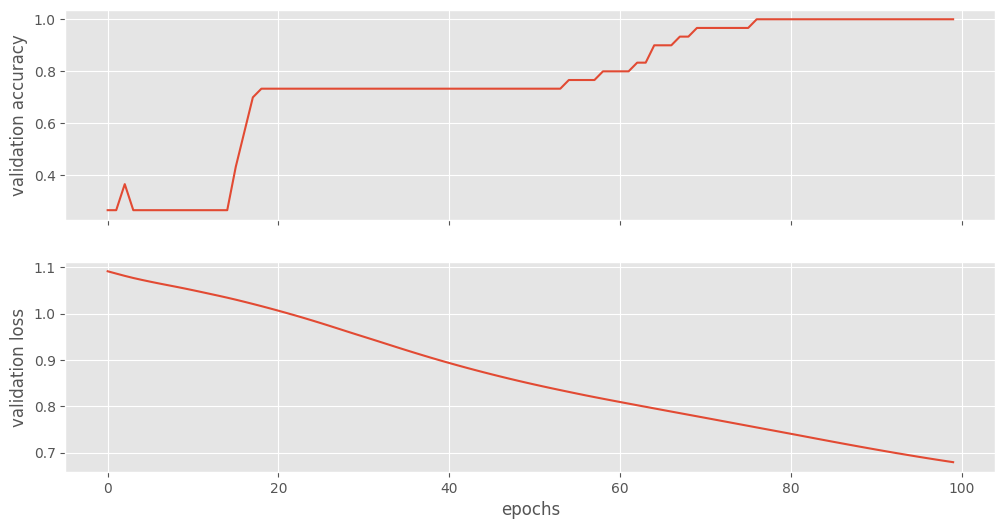

In [19]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")